# Assignment 2
## Due May 2nd

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances

# Exercise 1

Here we define the function that will generate our data

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

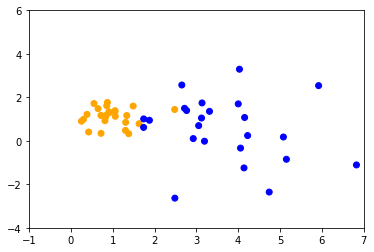

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset

In [5]:
test_n1, test_n2 = 100, 100

test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

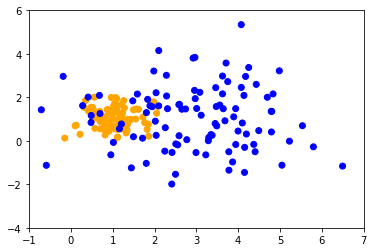

In [6]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$

In [7]:
def knnClassify(train_data, train_labels, test_data, k=1):
    test_labels = np.zeros(shape=(test_data.shape[0],))
    train_norm_squared = (train_data ** 2).sum(axis=1)
    for i, test_point in enumerate(test_data):
        dists = euclidean_distances([test_point], train_data , Y_norm_squared=train_norm_squared)
        neighbour_labels = train_labels[dists.argsort()[0,:k]]
        test_labels[i] = round(np.mean(neighbour_labels))
    return test_labels

In [8]:
pred_labels = knnClassify(train_data, train_labels, test_data, k=3)

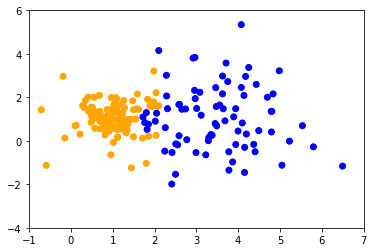

In [9]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in pred_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## c)

### Write your expectations for the results here

Most predictions should be correct, especially around the center of the individual distributions
The wrong predictions are probably going to be to the transition areas where it would also be hard for a human to tell.

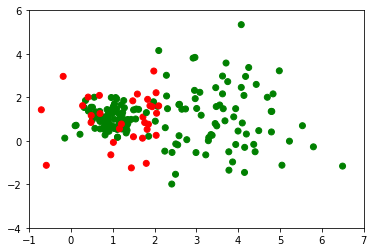

In [10]:
correct_preds = (test_labels == pred_labels)

fig = plt.figure()
color = ['green' if l else 'red' for l in correct_preds]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

### Comment

The plot matches the aticipation pretty well

## d)

define the empirical risk with 0-1-loss

In [11]:
def empRiskWith01loss(test_labels, pred_labels):
    return np.abs(test_labels - pred_labels).mean()

In [12]:
empRiskWith01loss(test_labels, pred_labels)

0.155

Compute the risk for various k and plot it

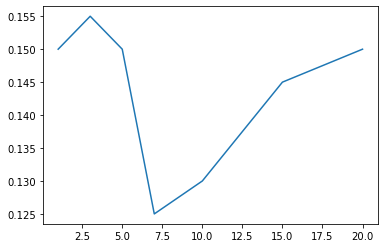

In [13]:
ks = [1, 3, 5, 7, 10, 15, 20]
risks = [empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)) for k in ks]


fig = plt.figure()
plt.plot(ks, risks)
plt.show()


### Which value of k would you use?

I would use k=7

### e)

In [14]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

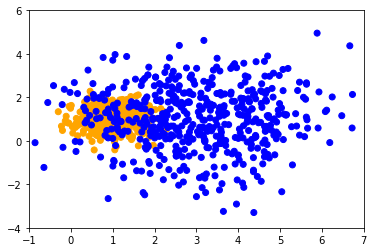

In [15]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

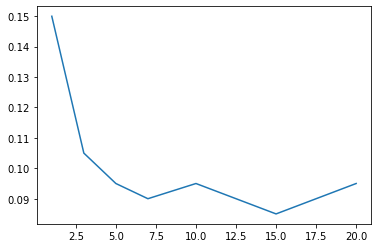

In [16]:
# plot the 01 emprirical risk for different values of k
ks = [1, 3, 5, 7, 10, 15, 20]
risks = [empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)) for k in ks]

fig = plt.figure()
plt.plot(ks, risks)
plt.show()


### Which k performs best in this case? If it changed, can you explain why?
$k=15$ performs best  
becase there are more training points, the $k$ neightbours will be closer than before, therefore you can get away with more neighbours without running into the issue of 'consulting' points that are too far away

### f)

In [17]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)


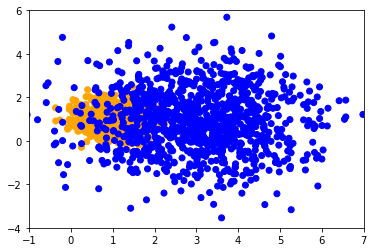

In [18]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

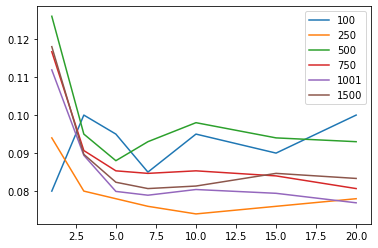

In [19]:
# plot the 01 emprirical risk for different values of k and n_test
ks = [1, 3, 5, 7, 10, 15, 20]
n_test_list = [100,250,500,750,1001,1500]

fig, ax = plt.subplots()
for n_test in n_test_list:
    test_data, test_labels = get_gaussian2d_data_with_labels(n_test, n_test)
    risks = [empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)) for k in ks]

    plt.plot(ks, risks)
plt.legend(n_test_list)
plt.show()

### Comment

For 100 test points, the risk seems almost random, as there are so few points, that a few wrongly/correctly classified points already change the empirical risk significantly

# Exercise 2
Load data and show one class

In [20]:
train_df = pd.read_csv('train_USPS.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).values
train_labels = train_df['Label'].values
test_df = pd.read_csv('test_USPS.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).values
test_labels = test_df['Label'].values

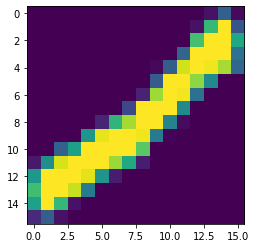

In [21]:
_ = plt.imshow(train_data[3].reshape(16,16))

## a)

Find out if the dataset is balanced

In [22]:
print(train_df.shape)
# find proportion of labels in training set
labels, count = np.unique(train_labels, return_counts=True)
for l, c in zip(labels, count):
    print(f'{l} :  {c}')

(10000, 257)
0 :  1000
1 :  1000
2 :  1000
3 :  1000
4 :  1000
5 :  1000
6 :  1000
7 :  1000
8 :  1000
9 :  1000


In [23]:
print(test_df.shape)
# find proportion of labels in test set
labels, count = np.unique(test_labels, return_counts=True)
for l, c in zip(labels, count):
    print(f'{l} :  {c}')

(1000, 257)
0 :  100
1 :  100
2 :  100
3 :  100
4 :  100
5 :  100
6 :  100
7 :  100
8 :  100
9 :  100


## b)

Compute knn for the USPS dataset

In [24]:
%%time
# calc
ks = [1, 3, 5, 7, 10, 15, 20, 100]
risks = [empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)) for k in ks]

CPU times: user 2min 38s, sys: 38.9 s, total: 3min 16s
Wall time: 27.2 s


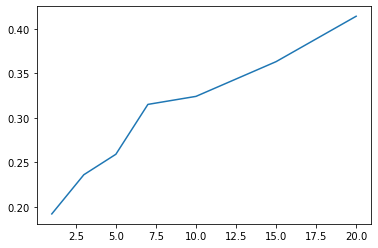

In [25]:
# plotting
fig = plt.figure()
plt.plot(ks[:-1], risks[:-1])
# plt.xscale('log')
plt.show()

# Exercise 3
## a)
$$f(T)_{MLE} =  \begin{cases}\text{summer}& \text{if } T \geq 15 \\ \text{winter} &\text{else}\end{cases}$$

## b)


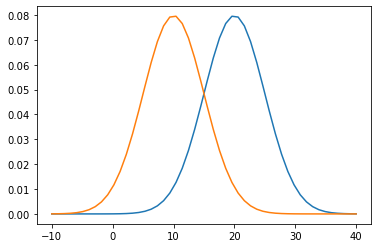

In [26]:
x = np.linspace(-10, 40)
scale = 5
w = stats.norm.pdf(x, loc=10.0, scale=scale)
s = stats.norm.pdf(x, loc=20.0, scale=scale)

fig, ax = plt.subplots()

ax.plot(x,s)
ax.plot(x,w)

plt.show()


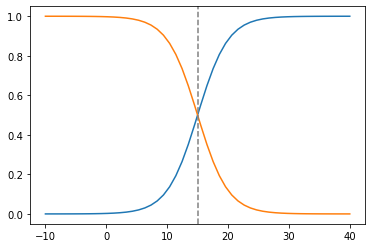

In [27]:
post_s = s * 0.5 / (w*0.5 + s*0.5)
post_w = w * 0.5 / (w*0.5 + s*0.5)


fig, ax = plt.subplots()
ax.plot(x,post_s)
ax.plot(x,post_w)
ax.axvline(15, color='gray', linestyle='--')
plt.show()

Bayes classifier:  
$$f(T)_{MLE} =  \begin{cases}\text{summer}& \text{if } T \geq 15 \\ \text{winter} &\text{else}\end{cases}$$


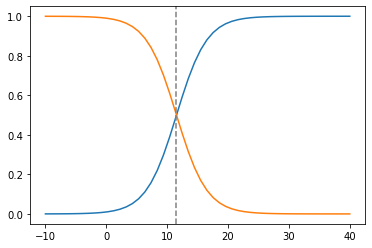

In [28]:
post_s = s * 0.8 / (w*0.2 + s*0.8)
post_w = w * 0.2 / (w*0.2 + s*0.8)


fig, ax = plt.subplots()
ax.plot(x,post_s)
ax.plot(x,post_w)
ax.axvline(11.5, color='gray', linestyle='--')
plt.show()

Bayes classifier:
$$f(T)_{MLE} =  \begin{cases}\text{summer}& \text{if } T \geq \approx
 11.5 \\ \text{winter} &\text{else}\end{cases}$$

# Exercise 04

## a)
Assuming $x_i = x_j \implies y_i = y_j\quad ∀ i,j \in \{1,\dots, n\}$  (1)
For all $(x_j, y_j)\in S \quad \exists i \in\{1,\dots, n\}$ s.t. $x_j=x_i$  
Therefore $h_S(x_j) = y_j$ as long as assumption (1) holds  
and $\{(x_i, y_i)\in S : h_S(x_i) \neq y_i\} = \emptyset$  
Thus $L_S(h) = 0$

## b)
The predictor returns 0, whenever the given point can not be found in $S$.  
In a uniform distribution, the probability $P(∃i ∈ \{1,...,n\} s.t. x = x_i)$ for any sampled point $x$ is 0.  
Therefore the predictor __always__ predicts 0. ($h_S(x) = 0 \quad∀x\in[-2,2]^2$)  
The probability of the true label being '1' is $P(y=1) = \frac{(1-(-1))^2}{ (2-(-2))^2} = \frac{1}{4}$  
Thus $R(h_S) = \frac{1}{4}\cdot 1 + \big( 1-\frac{1}{4}\big) \cdot 0 = \frac{1}{4}$

## c)
For the condition to be true, $p_{S_1}(x) < 0 $ must hold for all $x$ in and $p_{S_1}(x) \geq 0 $ must hold for all $x \in S_1$  
This can be achieved with a polynomial that has maxima with $p_{S_1}(x)= 0$ at all points $x\in S_1$


$$ p_{S_1}(x) = -\prod_{\hat{x} \in S_1} \left(x-\hat{x}\right)^2$$

## d)
Limiting the degree of the polynomial makes it impossible to construct the polynomial from __c)__. Thus overfitting will be somewhat reduced.